In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict

In [2]:
import os, sys
sys.path.append(os.getcwd())

In [3]:
from _element import feature_control as ft_c
from _element import varr
from _element import calculations as calc
from _element.result_control import Result

from _alg.prophet import Prophet_timeseries

from _evaluation.cross_validation import Cross_Validation
from _evaluation import compare

In [4]:
INPUT_FILENAME= 'KPP일별투입(10_17)_raw.xlsx'

In [5]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [6]:
y_col= df_raw['raw'].columns.values.tolist()

In [7]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [8]:
x_col= df_temp['raw'].columns.values.tolist()

In [9]:
df_raw['raw']['ds']= pd.to_datetime(df_raw['raw']['ds'], box=True, format= '%Y/%m/%d', exact=True)
df_temp['raw']['ds']= pd.to_datetime(df_temp['raw']['ds'], box=True, format= '%Y/%m/%d', exact=True)
df_raw['raw']= pd.merge(df_raw['raw'], df_temp['raw'], how='inner', on='ds')

In [10]:
df_raw

{'raw':              ds       y   temp_max   temp_min  rain_amount
 0    2010-07-01   79590  30.500000  24.900000          0.0
 1    2010-07-02   79456  25.799999  22.700001         70.0
 2    2010-07-03   48469  25.600000  22.600000          1.0
 3    2010-07-04    1045  29.700001  23.100000          0.0
 4    2010-07-05   65049  30.600000  21.799999          0.0
 5    2010-07-06   84245  31.000000  22.400000          0.0
 6    2010-07-07   80493  29.600000  21.900000          0.0
 7    2010-07-08   73930  29.000000  21.299999          0.0
 8    2010-07-09   80166  29.299999  21.799999          0.0
 9    2010-07-10   49542  29.100000  22.900000          0.0
 10   2010-07-11    1411  25.900000  21.000000          0.0
 11   2010-07-12   67680  28.299999  22.200001          0.0
 12   2010-07-13   83587  31.299999  21.900000          0.0
 13   2010-07-14   73490  27.500000  22.700001          1.0
 14   2010-07-15   73332  29.799999  24.299999          0.0
 15   2010-07-16   74715  27.1000

In [11]:
r= Result()

In [12]:
prpt_basis= Prophet_timeseries(cv= True)

In [13]:
prpt_basis.add_model('basis', 'day', regressor= None)

In [14]:
cv= Cross_Validation(df_raw)

In [15]:
cv.slice('y', x_col)

In [16]:
cv._data

{'raw_0': {'test':              ds       y  temp_max  temp_min  rain_amount
  2703 2017-11-24  120647       2.9      -2.5          0.1
  2704 2017-11-25   67756       6.4       0.8         15.7
  2705 2017-11-26     100       6.4      -2.4          0.0
  2706 2017-11-27  117480       8.1       1.8          0.0
  2707 2017-11-28  122192       9.8       4.2          1.2
  2708 2017-11-29  120685       5.7      -3.2          0.0
  2709 2017-11-30  108386       1.8      -7.1          0.0,
  'testX':              ds  temp_max  temp_min  rain_amount
  2703 2017-11-24       2.9      -2.5          0.1
  2704 2017-11-25       6.4       0.8         15.7
  2705 2017-11-26       6.4      -2.4          0.0
  2706 2017-11-27       8.1       1.8          0.0
  2707 2017-11-28       9.8       4.2          1.2
  2708 2017-11-29       5.7      -3.2          0.0
  2709 2017-11-30       1.8      -7.1          0.0,
  'testY': 2703    120647
  2704     67756
  2705       100
  2706    117480
  2707    12219

In [17]:
prpt_basis.fit('basis', txs_traintest= cv._data)

In [18]:
prpt_basis.forecast('basis', forecast_dict= r.forecast_dict)

C:\Studying\Project_Nextop\nextop-engine\nextop_engine\_alg\prophet.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result_forecast['ds'], box=True, format= '%Y/%m/%d', exact=True


In [19]:
r.err_rate()

In [20]:
r.avg_result('basis', delete_case= True)

{'forecast': [          ds       y  temp_max  temp_min  rain_amount           yhat
0 2017-11-24  120647       2.9      -2.5          0.1  120298.191576
1 2017-11-25   67756       6.4       0.8         15.7   76350.109082
2 2017-11-26     100       6.4      -2.4          0.0   20686.185701
3 2017-11-27  117480       8.1       1.8          0.0  106682.549652
4 2017-11-28  122192       9.8       4.2          1.2  118425.903994
5 2017-11-29  120685       5.7      -3.2          0.0  117162.884648
6 2017-11-30  108386       1.8      -7.1          0.0  114772.978498,           ds       y   temp_max   temp_min  rain_amount           yhat
0 2017-09-15  146743  27.299999  17.200001          0.0  126476.262510
1 2017-09-16   78827  26.100000  19.200001          0.0   82202.967724
2 2017-09-17     630  27.400000  17.500000          0.0   26666.945268
3 2017-09-18  124903  27.100000  19.200001          0.0  111672.243853
4 2017-09-19  142824  25.900000  14.900000          5.8  123314.968762
5 2017-

In [21]:
r.print_err_rate()

RMSE with segment basis_result: 15055.6663
MAPE with segment basis_result: 2698.1812
MAPE_with_std with segment basis_result: 27.8162
MAPE_div_std with segment basis_result: 111.6983
sMAPE with segment basis_result: 13.0811




In [22]:
del r.forecast_dict['basis_result']

In [23]:
ft_c.add_division(df_raw, 'raw', 7, start_num= 3)

In [24]:
ft_c.divide_by(df_raw, 'raw', 'seasonality_7,3')

In [25]:
cv2= Cross_Validation(df_raw)

In [26]:
cv2.slice('y', x_col, forecastday= varr.FORECASTDAY//7)

In [27]:
cv2._data

{'(0,)_0': {'test':              ds       y  temp_max  temp_min  rain_amount  seasonality_7,3
  2706 2017-11-27  117480       8.1       1.8          0.0                0,
  'testX':              ds  temp_max  temp_min  rain_amount
  2706 2017-11-27       8.1       1.8          0.0,
  'testY': 2706    117480
  Name: y, dtype: int64,
  'train':              ds       y   temp_max   temp_min  rain_amount  seasonality_7,3
  4    2010-07-05   65049  30.600000  21.799999          0.0                0
  11   2010-07-12   67680  28.299999  22.200001          0.0                0
  18   2010-07-19   73816  29.299999  24.200001          0.0                0
  25   2010-07-26   75731  27.600000  23.400000          6.0                0
  32   2010-08-02   67290  31.600000  24.000000          1.0                0
  39   2010-08-09   67691  32.799999  26.400000          0.0                0
  46   2010-08-16   70947  26.500000  21.000000          0.0                0
  53   2010-08-23   71422  28.900

In [28]:
prpt_basis.add_model('seasonality_7', 'week', regressor= ['temp_max', 'temp_min', 'rain_amount'])

In [29]:
prpt_basis.fit('seasonality_7', txs_traintest= cv2._data)

In [30]:
prpt_basis.forecast('seasonality_7', forecast_dict= r.forecast_dict)

C:\Studying\Project_Nextop\nextop-engine\nextop_engine\_alg\prophet.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result_forecast['ds'], box=True, format= '%Y/%m/%d', exact=True


In [31]:
r.merge_result(m_name= ['_0', '_1', '_2', '_3', '_4'], m_title= 'seasonality7')

{'forecast':           ds       y  temp_max  temp_min  rain_amount  seasonality_7,3  \
0 2017-11-24  120647       2.9      -2.5          0.1                4   
0 2017-11-25   67756       6.4       0.8         15.7                5   
0 2017-11-26     100       6.4      -2.4          0.0                6   
0 2017-11-27  117480       8.1       1.8          0.0                0   
0 2017-11-28  122192       9.8       4.2          1.2                1   
0 2017-11-29  120685       5.7      -3.2          0.0                2   
0 2017-11-30  108386       1.8      -7.1          0.0                3   

            yhat  
0  124252.773357  
0   62118.318722  
0    -158.313977  
0  113656.250652  
0  122243.088237  
0  123414.510679  
0  123068.156420  }
{'forecast':           ds       y   temp_max   temp_min  rain_amount  seasonality_7,3  \
0 2017-09-15  146743  27.299999  17.200001          0.0                4   
0 2017-09-16   78827  26.100000  19.200001          0.0                5   


In [32]:
r.err_rate(m_name= 'seasonality7')
r.print_err_rate()

RMSE with segment seasonality7__0_merged: 6352.6304
MAPE with segment seasonality7__0_merged: 41.2468
MAPE_with_std with segment seasonality7__0_merged: 20.4904
MAPE_div_std with segment seasonality7__0_merged: 71.6075
sMAPE with segment seasonality7__0_merged: 4.6443


RMSE with segment seasonality7__1_merged: 10439.3370
MAPE with segment seasonality7__1_merged: 21.4253
MAPE_with_std with segment seasonality7__1_merged: 24.4303
MAPE_div_std with segment seasonality7__1_merged: 237.9860
sMAPE with segment seasonality7__1_merged: 9.2254


RMSE with segment seasonality7__2_merged: 6789.1498
MAPE with segment seasonality7__2_merged: 29.3089
MAPE_with_std with segment seasonality7__2_merged: 20.5964
MAPE_div_std with segment seasonality7__2_merged: 82.7363
sMAPE with segment seasonality7__2_merged: 5.2324


RMSE with segment seasonality7__3_merged: 25473.8159
MAPE with segment seasonality7__3_merged: 35.7587
MAPE_with_std with segment seasonality7__3_merged: 36.6961
MAPE_div_std with segme

In [33]:
r.avg_result(m_name= 'seasonality7')

{'forecast': [          ds       y  temp_max  temp_min  rain_amount  seasonality_7,3  \
0 2017-11-24  120647       2.9      -2.5          0.1                4   
0 2017-11-25   67756       6.4       0.8         15.7                5   
0 2017-11-26     100       6.4      -2.4          0.0                6   
0 2017-11-27  117480       8.1       1.8          0.0                0   
0 2017-11-28  122192       9.8       4.2          1.2                1   
0 2017-11-29  120685       5.7      -3.2          0.0                2   
0 2017-11-30  108386       1.8      -7.1          0.0                3   

            yhat  
0  124252.773357  
0   62118.318722  
0    -158.313977  
0  113656.250652  
0  122243.088237  
0  123414.510679  
0  123068.156420  ,           ds       y   temp_max   temp_min  rain_amount  seasonality_7,3  \
0 2017-09-15  146743  27.299999  17.200001          0.0                4   
0 2017-09-16   78827  26.100000  19.200001          0.0                5   
0 2017-09-17

In [34]:
r.print_err_rate()

RMSE with segment seasonality7_result: 13848.2891
MAPE with segment seasonality7_result: 33.2936
MAPE_with_std with segment seasonality7_result: 25.2648
MAPE_div_std with segment seasonality7_result: 139.5644
sMAPE with segment seasonality7_result: 12.1589




In [35]:
prpt_basis._model.keys()

dict_keys(['basis', 'basis_raw_0', 'basis_raw_1', 'basis_raw_2', 'basis_raw_3', 'basis_raw_4', 'seasonality_7', 'seasonality_7_(0,)_0', 'seasonality_7_(0,)_1', 'seasonality_7_(0,)_2', 'seasonality_7_(0,)_3', 'seasonality_7_(0,)_4', 'seasonality_7_(1,)_0', 'seasonality_7_(1,)_1', 'seasonality_7_(1,)_2', 'seasonality_7_(1,)_3', 'seasonality_7_(1,)_4', 'seasonality_7_(2,)_0', 'seasonality_7_(2,)_1', 'seasonality_7_(2,)_2', 'seasonality_7_(2,)_3', 'seasonality_7_(2,)_4', 'seasonality_7_(3,)_0', 'seasonality_7_(3,)_1', 'seasonality_7_(3,)_2', 'seasonality_7_(3,)_3', 'seasonality_7_(3,)_4', 'seasonality_7_(4,)_0', 'seasonality_7_(4,)_1', 'seasonality_7_(4,)_2', 'seasonality_7_(4,)_3', 'seasonality_7_(4,)_4', 'seasonality_7_(5,)_0', 'seasonality_7_(5,)_1', 'seasonality_7_(5,)_2', 'seasonality_7_(5,)_3', 'seasonality_7_(5,)_4', 'seasonality_7_(6,)_0', 'seasonality_7_(6,)_1', 'seasonality_7_(6,)_2', 'seasonality_7_(6,)_3', 'seasonality_7_(6,)_4'])

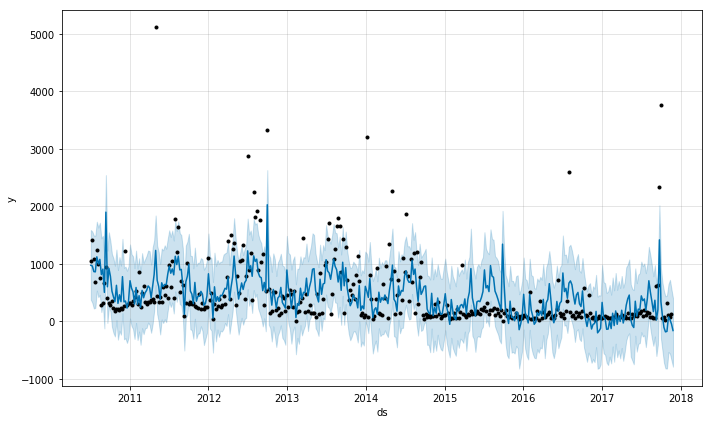

In [37]:
prpt_basis._model['seasonality_7_(6,)_0']['model'].plot(prpt_basis._model['seasonality_7_(6,)_0']['forecastProphetTable'])

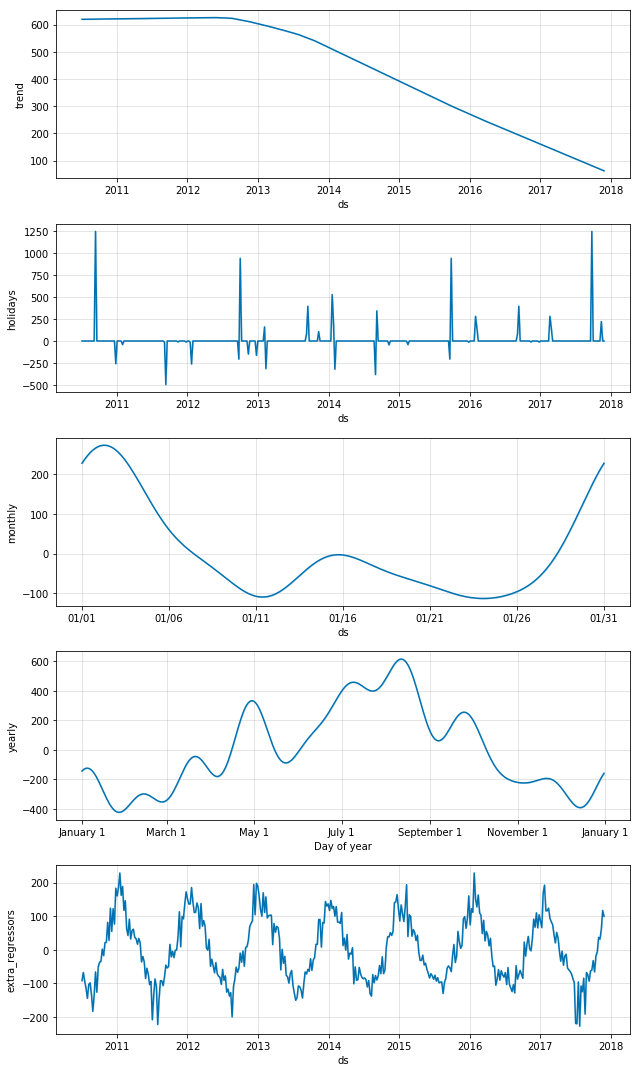

In [39]:
prpt_basis._model['seasonality_7_(6,)_0']['model'].plot_components(prpt_basis._model['seasonality_7_(6,)_0']['forecastProphetTable'])

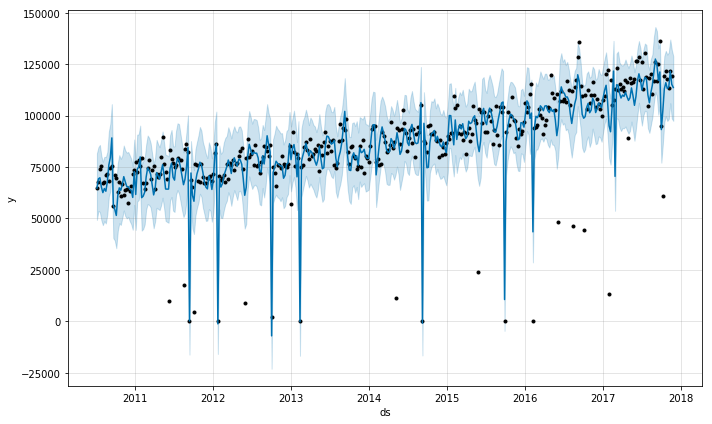

In [41]:
prpt_basis._model['seasonality_7_(0,)_0']['model'].plot(prpt_basis._model['seasonality_7_(0,)_0']['forecastProphetTable'])

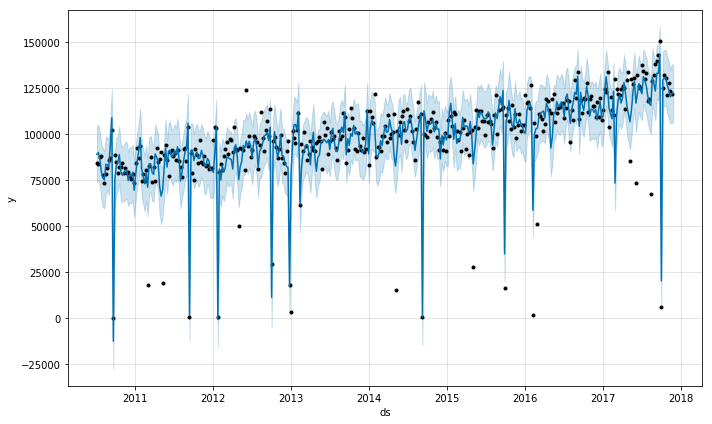

In [42]:
prpt_basis._model['seasonality_7_(1,)_0']['model'].plot(prpt_basis._model['seasonality_7_(1,)_0']['forecastProphetTable'])

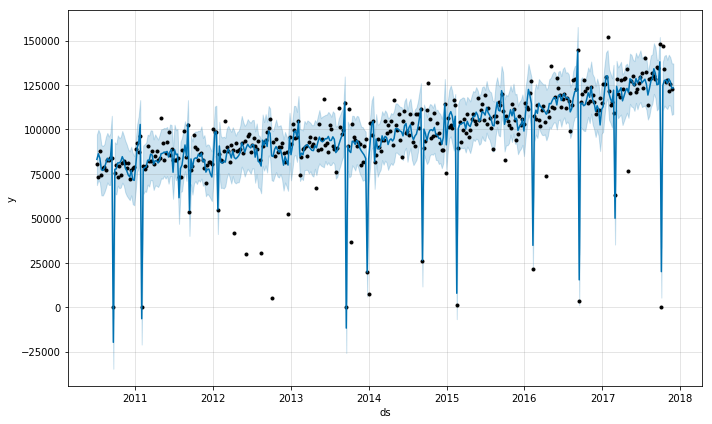

In [43]:
prpt_basis._model['seasonality_7_(2,)_0']['model'].plot(prpt_basis._model['seasonality_7_(2,)_0']['forecastProphetTable'])

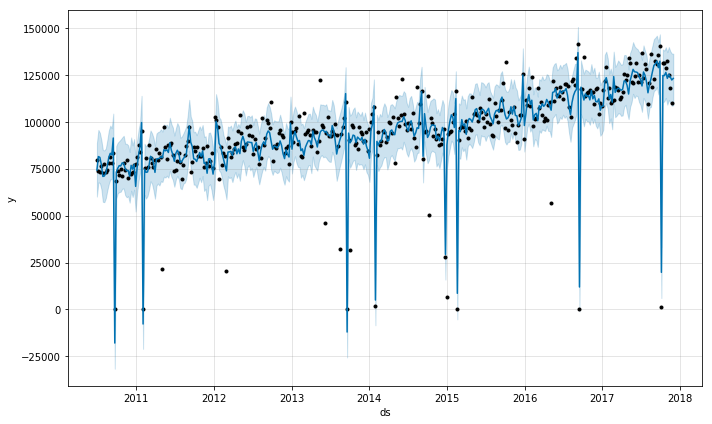

In [44]:
prpt_basis._model['seasonality_7_(3,)_0']['model'].plot(prpt_basis._model['seasonality_7_(3,)_0']['forecastProphetTable'])

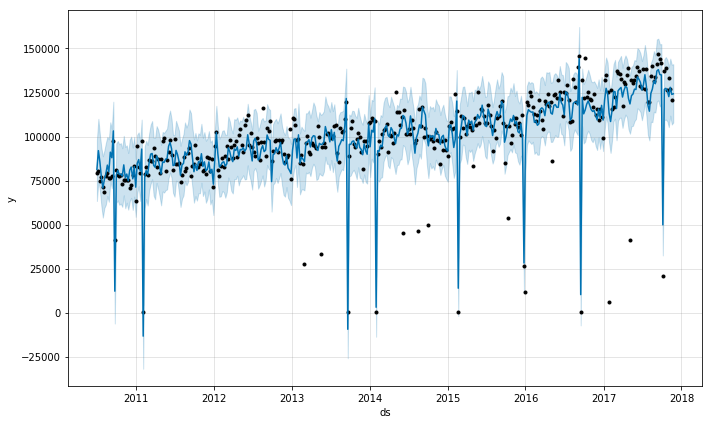

In [45]:
prpt_basis._model['seasonality_7_(4,)_0']['model'].plot(prpt_basis._model['seasonality_7_(4,)_0']['forecastProphetTable'])

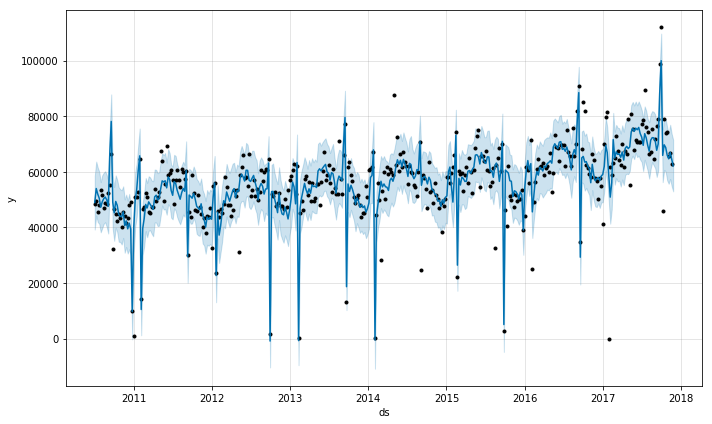

In [46]:
prpt_basis._model['seasonality_7_(5,)_0']['model'].plot(prpt_basis._model['seasonality_7_(5,)_0']['forecastProphetTable'])